In [1]:
import numpy as np
import pandas as pd
from lmfit import Model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
import scipy
import math
import scipy.integrate as integrate
import scipy.special as special
from scipy.stats import norm
import matplotlib.mlab as mlab

In [2]:
#names of colums from data
names=['x [mm]','y [mm]','z [mm]','Px [MeV/c]','Py [MeV/c]','Pz[MeV/c]','t [ns]','PDGid [/]','EventID [/]','TrackID [/]','ParentID [/]','Weight[/]']

In [3]:
#reading the data
file = r"C:\Users\Stefan\Documents\Masterarbeit\G4Beamline\BL1U\VD_6600.txt"

In [4]:
#Data HARP0
DataFrame = pd.read_csv(file, header=None, sep=' ', comment='#', names=names)
DataFrame_dtype = 'float'
n = 100 #number of events
DataFrame

x [mm]    y [mm]  z [mm]  Px [MeV/c]  Py [MeV/c]  Pz[MeV/c]   t [ns]  \
0     -4.616800  0.535082  6599.5   -1.857470    0.475590    1063.01  29.3934   
1      4.836720 -0.402511  6599.5    1.875040   -0.953253    1062.49  29.3937   
2      0.858303 -0.060852  6599.5    0.513313    0.381953    1063.12  29.3891   
3      4.467710  0.744415  6599.5    1.784770    0.068175    1063.31  29.3840   
4     -3.478790  0.248290  6599.5   -1.524520   -0.701582    1064.34  29.3767   
...         ...       ...     ...         ...         ...        ...      ...   
99995  5.271890  0.003272  6599.5    2.057070    0.508202    1062.60  29.3920   
99996  2.862940 -0.124741  6599.5    1.116250   -0.075198    1062.79  29.3912   
99997 -4.164930 -1.824330  6599.5   -1.783280   -1.313920    1062.74  29.3964   
99998 -4.202830 -1.053330  6599.5   -1.708140   -0.972463    1063.88  29.3828   
99999 -4.652510 -0.162754  6599.5   -1.903680    0.192831    1063.26  29.3904   

       PDGid [/]  EventID [/]  TrackID [/]  ParentID [/]  Weight[/]  
0           2212            1            1             0          1  
1           2212            2            1             0          1  
2           2212            3            1             0          1  
3           2212            4            1             0          1  
4           2212            5            1             0          1  
...          ...          ...          ...           ...        ...  
99995       2212        99996            1             0          1  
99996       2212        99997            1             0          1  
99997       2212        99998            1             0          1  
99998       2212        99999            1             0          1  
99999       2212       100000            1             0          1  

[100000 rows x 12 columns]

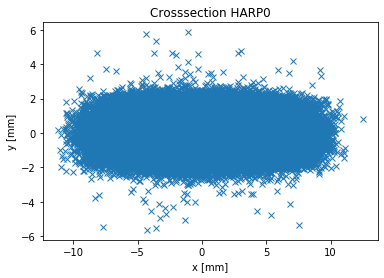

In [5]:
# plot of the cross-section of incidence
plt.figure(1) 
plt.plot(DataFrame['x [mm]'],DataFrame['y [mm]'],'x') 
#plt.title('Crosssection HARP0')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-60, 60)
plt.ylim(-50, 50)
plt.xlabel('x [mm]', fontsize=15)
plt.ylabel('y [mm]', fontsize=15)
plt.savefig("C:\\Users\\Stefan\\Documents\\Masterarbeit\\G4Beamline\\BL1U\\BeamProfiles\\{0}-BeamProfile.png".format(DataFrame['z [mm]'][1]), bbox_inches = "tight")
plt.show()

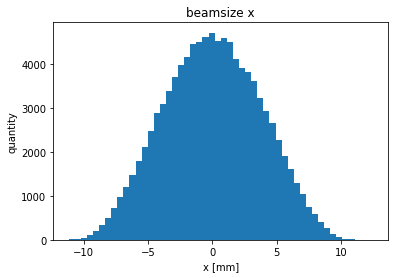

In [6]:
# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['x [mm]'], bins = 50) 
plt.title('beamsize x') 
plt.xlabel('x [mm]') 
plt.ylabel('quantity') 
plt.show()

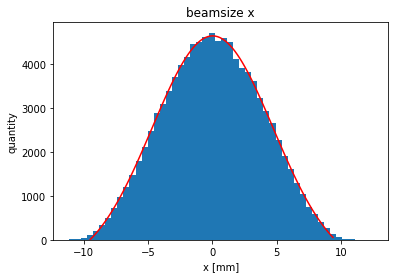

In [7]:
#Fitting of the histogram

#Define Fitting Function 
def FitFunction(x, A, mu, sig, Bkg):
    Gauss = A * np.exp(-(x-mu)**2/(2.*sig*sig)) + Bkg
    return Gauss

#number of points in each bin
numberInBin_x = np.histogram(DataFrame['x [mm]'], bins = 50)
numberInBin2_x = numberInBin_x[0]

#duplicate numbers to become the same amount of values as for the x sizes
numberInBin3_x0 =np.repeat(numberInBin2_x[0], numberInBin2_x[0])
numberInBin3_x0 = numberInBin3_x0.astype('int')
numberInBin3_x1 =np.repeat(numberInBin2_x[1], numberInBin2_x[1])
numberInBin3_x1 = numberInBin3_x1.astype('int')
numberInBin3_x2 =np.repeat(numberInBin2_x[2], numberInBin2_x[2])
numberInBin3_x2 = numberInBin3_x2.astype('int')
numberInBin3_x3 =np.repeat(numberInBin2_x[3], numberInBin2_x[3])
numberInBin3_x3 = numberInBin3_x3.astype('int')
numberInBin3_x4 =np.repeat(numberInBin2_x[4], numberInBin2_x[4])
numberInBin3_x4 = numberInBin3_x4.astype('int')
numberInBin3_x5 =np.repeat(numberInBin2_x[5], numberInBin2_x[5])
numberInBin3_x5 = numberInBin3_x5.astype('int')
numberInBin3_x6 =np.repeat(numberInBin2_x[6], numberInBin2_x[6])
numberInBin3_x6 = numberInBin3_x6.astype('int')
numberInBin3_x7 =np.repeat(numberInBin2_x[7], numberInBin2_x[7])
numberInBin3_x7 = numberInBin3_x7.astype('int')
numberInBin3_x8 =np.repeat(numberInBin2_x[8], numberInBin2_x[8])
numberInBin3_x8 = numberInBin3_x8.astype('int')
numberInBin3_x9 =np.repeat(numberInBin2_x[9], numberInBin2_x[9])
numberInBin3_x9 = numberInBin3_x9.astype('int')
numberInBin3_x10 =np.repeat(numberInBin2_x[10], numberInBin2_x[10])
numberInBin3_x10 = numberInBin3_x10.astype('int')
numberInBin3_x11 =np.repeat(numberInBin2_x[11], numberInBin2_x[11])
numberInBin3_x11 = numberInBin3_x11.astype('int')
numberInBin3_x12 =np.repeat(numberInBin2_x[12], numberInBin2_x[12])
numberInBin3_x12 = numberInBin3_x12.astype('int')
numberInBin3_x13 =np.repeat(numberInBin2_x[13], numberInBin2_x[13])
numberInBin3_x13 = numberInBin3_x13.astype('int')
numberInBin3_x14 =np.repeat(numberInBin2_x[14], numberInBin2_x[14])
numberInBin3_x14 = numberInBin3_x14.astype('int')
numberInBin3_x15 =np.repeat(numberInBin2_x[15], numberInBin2_x[15])
numberInBin3_x15 = numberInBin3_x15.astype('int')
numberInBin3_x16 =np.repeat(numberInBin2_x[16], numberInBin2_x[16])
numberInBin3_x16 = numberInBin3_x16.astype('int')
numberInBin3_x17 =np.repeat(numberInBin2_x[17], numberInBin2_x[17])
numberInBin3_x17 = numberInBin3_x17.astype('int')
numberInBin3_x18 =np.repeat(numberInBin2_x[18], numberInBin2_x[18])
numberInBin3_x18 = numberInBin3_x18.astype('int')
numberInBin3_x19 =np.repeat(numberInBin2_x[19], numberInBin2_x[19])
numberInBin3_x19 = numberInBin3_x19.astype('int')
numberInBin3_x20 =np.repeat(numberInBin2_x[20], numberInBin2_x[20])
numberInBin3_x20 = numberInBin3_x20.astype('int')
numberInBin3_x21 =np.repeat(numberInBin2_x[21], numberInBin2_x[21])
numberInBin3_x21 = numberInBin3_x21.astype('int')
numberInBin3_x22 =np.repeat(numberInBin2_x[22], numberInBin2_x[22])
numberInBin3_x22 = numberInBin3_x22.astype('int')
numberInBin3_x23 =np.repeat(numberInBin2_x[23], numberInBin2_x[23])
numberInBin3_x23 = numberInBin3_x23.astype('int')
numberInBin3_x24 =np.repeat(numberInBin2_x[24], numberInBin2_x[24])
numberInBin3_x24 = numberInBin3_x24.astype('int')
numberInBin3_x25 =np.repeat(numberInBin2_x[25], numberInBin2_x[25])
numberInBin3_x25 = numberInBin3_x25.astype('int')
numberInBin3_x26 =np.repeat(numberInBin2_x[26], numberInBin2_x[26])
numberInBin3_x26 = numberInBin3_x26.astype('int')
numberInBin3_x27 =np.repeat(numberInBin2_x[27], numberInBin2_x[27])
numberInBin3_x27 = numberInBin3_x27.astype('int')
numberInBin3_x28 =np.repeat(numberInBin2_x[28], numberInBin2_x[28])
numberInBin3_x28 = numberInBin3_x28.astype('int')
numberInBin3_x29 =np.repeat(numberInBin2_x[29], numberInBin2_x[29])
numberInBin3_x29 = numberInBin3_x29.astype('int')
numberInBin3_x30 =np.repeat(numberInBin2_x[30], numberInBin2_x[30])
numberInBin3_x30 = numberInBin3_x30.astype('int')
numberInBin3_x31 =np.repeat(numberInBin2_x[31], numberInBin2_x[31])
numberInBin3_x31 = numberInBin3_x31.astype('int')
numberInBin3_x32 =np.repeat(numberInBin2_x[32], numberInBin2_x[32])
numberInBin3_x32 = numberInBin3_x32.astype('int')
numberInBin3_x33 =np.repeat(numberInBin2_x[33], numberInBin2_x[33])
numberInBin3_x33 = numberInBin3_x33.astype('int')
numberInBin3_x34 =np.repeat(numberInBin2_x[34], numberInBin2_x[34])
numberInBin3_x34 = numberInBin3_x34.astype('int')
numberInBin3_x35 =np.repeat(numberInBin2_x[35], numberInBin2_x[35])
numberInBin3_x35 = numberInBin3_x35.astype('int')
numberInBin3_x36 =np.repeat(numberInBin2_x[36], numberInBin2_x[36])
numberInBin3_x36 = numberInBin3_x36.astype('int')
numberInBin3_x37 =np.repeat(numberInBin2_x[37], numberInBin2_x[37])
numberInBin3_x37 = numberInBin3_x37.astype('int')
numberInBin3_x38 =np.repeat(numberInBin2_x[38], numberInBin2_x[38])
numberInBin3_x38 = numberInBin3_x38.astype('int')
numberInBin3_x39 =np.repeat(numberInBin2_x[39], numberInBin2_x[39])
numberInBin3_x39 = numberInBin3_x39.astype('int')
numberInBin3_x40 =np.repeat(numberInBin2_x[40], numberInBin2_x[40])
numberInBin3_x40 = numberInBin3_x40.astype('int')
numberInBin3_x41 =np.repeat(numberInBin2_x[41], numberInBin2_x[41])
numberInBin3_x41 = numberInBin3_x41.astype('int')
numberInBin3_x42 =np.repeat(numberInBin2_x[42], numberInBin2_x[42])
numberInBin3_x42 = numberInBin3_x42.astype('int')
numberInBin3_x43 =np.repeat(numberInBin2_x[43], numberInBin2_x[43])
numberInBin3_x43 = numberInBin3_x43.astype('int')
numberInBin3_x44 =np.repeat(numberInBin2_x[44], numberInBin2_x[44])
numberInBin3_x44 = numberInBin3_x44.astype('int')
numberInBin3_x45 =np.repeat(numberInBin2_x[45], numberInBin2_x[45])
numberInBin3_x45 = numberInBin3_x45.astype('int')
numberInBin3_x46 =np.repeat(numberInBin2_x[46], numberInBin2_x[46])
numberInBin3_x46 = numberInBin3_x46.astype('int')
numberInBin3_x47 =np.repeat(numberInBin2_x[47], numberInBin2_x[47])
numberInBin3_x47 = numberInBin3_x47.astype('int')
numberInBin3_x48 =np.repeat(numberInBin2_x[48], numberInBin2_x[48])
numberInBin3_x48 = numberInBin3_x48.astype('int')
numberInBin3_x49 =np.repeat(numberInBin2_x[49], numberInBin2_x[49])
numberInBin3_x49 = numberInBin3_x49.astype('int')
numberInBin3_x = np.concatenate([numberInBin3_x0, numberInBin3_x1, numberInBin3_x2, numberInBin3_x3, numberInBin3_x4 ,numberInBin3_x5 ,numberInBin3_x6 ,numberInBin3_x7 , numberInBin3_x8 ,numberInBin3_x9,numberInBin3_x10, numberInBin3_x11, numberInBin3_x12, numberInBin3_x13, numberInBin3_x14 ,numberInBin3_x15 ,numberInBin3_x16 ,numberInBin3_x17 , numberInBin3_x18 ,numberInBin3_x19,numberInBin3_x20, numberInBin3_x21, numberInBin3_x22, numberInBin3_x23, numberInBin3_x24 ,numberInBin3_x25 ,numberInBin3_x26 ,numberInBin3_x27 , numberInBin3_x28 ,numberInBin3_x29,numberInBin3_x30, numberInBin3_x31, numberInBin3_x32, numberInBin3_x33, numberInBin3_x34 ,numberInBin3_x35 ,numberInBin3_x36 ,numberInBin3_x37 , numberInBin3_x38 ,numberInBin3_x39,numberInBin3_x40, numberInBin3_x41, numberInBin3_x42, numberInBin3_x43, numberInBin3_x44 ,numberInBin3_x45 ,numberInBin3_x46 ,numberInBin3_x47 , numberInBin3_x48 ,numberInBin3_x49])
numberInBin3_x

#actual fit
priors_x = [1, 0, 2, 1]
popt_x, pcov_x = curve_fit(FitFunction,np.sort(DataFrame['x [mm]']), numberInBin3_x, priors_x, maxfev=10000)

#definition of sigma2_x
sigma_x = popt_x[2]
sigma2_x = sigma_x *2

#define points for a smoth fit line
xspace = np.linspace(np.amin(DataFrame['x [mm]']), np.amax(DataFrame['x [mm]']), 100)

#limitation of the plot area (only where quantitiy>0)
#search for y-transition from negative to positive, to plot only positive curve
posCurve = np.where(FitFunction(xspace, *popt_x)>0)
xspace2 = np.linspace(xspace[posCurve[0][0]], xspace[posCurve[0][len(posCurve[0])-1]], 100)

# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['x [mm]'], bins = 50)  
ax= plt.plot(xspace2,FitFunction(xspace2, *popt_x),'r-')
plt.title('beamsize x') 
plt.xlabel('x [mm]') 
plt.ylabel('quantity') 
plt.show()

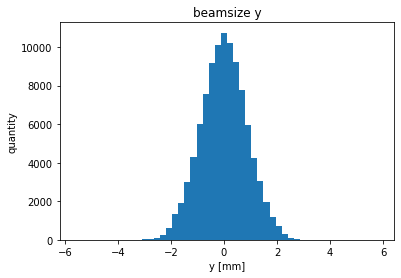

In [8]:
# plot of the beamsize y
plt.figure(3) 
plt.hist(DataFrame['y [mm]'], bins = 50)
plt.title('beamsize y') 
plt.xlabel('y [mm]') 
plt.ylabel('quantity') 
plt.show()

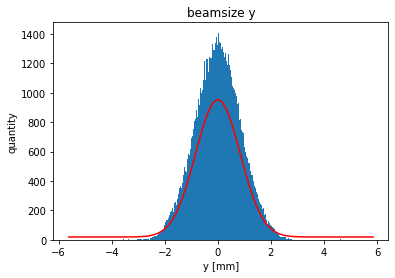

In [12]:
#Fitting of the histogram

#test
pd_series = DataFrame['y [mm]']
pd_series_adjusted = pd_series[pd_series.between(pd_series.quantile(.00), pd_series.quantile(.999))]

#number of points in each bin
numberInBin_y = np.histogram(pd_series_adjusted, bins = 400)
numberInBin2_y = numberInBin_y[0]

#duplicate numbers 10 times to become the same amount of values as for the x sizes
numberInBin3_y0 =np.repeat(numberInBin2_y[0], numberInBin2_y[0])
numberInBin3_y0 = numberInBin3_y0.astype('int')
numberInBin3_y1 =np.repeat(numberInBin2_y[1], numberInBin2_y[1])
numberInBin3_y1 = numberInBin3_y1.astype('int')
numberInBin3_y2 =np.repeat(numberInBin2_y[2], numberInBin2_y[2])
numberInBin3_y2 = numberInBin3_y2.astype('int')
numberInBin3_y3 =np.repeat(numberInBin2_y[3], numberInBin2_y[3])
numberInBin3_y3 = numberInBin3_y3.astype('int')
numberInBin3_y4 =np.repeat(numberInBin2_y[4], numberInBin2_y[4])
numberInBin3_y4 = numberInBin3_y4.astype('int')
numberInBin3_y5 =np.repeat(numberInBin2_y[5], numberInBin2_y[5])
numberInBin3_y5 = numberInBin3_y5.astype('int')
numberInBin3_y6 =np.repeat(numberInBin2_y[6], numberInBin2_y[6])
numberInBin3_y6 = numberInBin3_y6.astype('int')
numberInBin3_y7 =np.repeat(numberInBin2_y[7], numberInBin2_y[7])
numberInBin3_y7 = numberInBin3_y7.astype('int')
numberInBin3_y8 =np.repeat(numberInBin2_y[8], numberInBin2_y[8])
numberInBin3_y8 = numberInBin3_y8.astype('int')
numberInBin3_y9 =np.repeat(numberInBin2_y[9], numberInBin2_y[9])
numberInBin3_y9 = numberInBin3_y9.astype('int')
numberInBin3_y10 =np.repeat(numberInBin2_y[10], numberInBin2_y[10])
numberInBin3_y10 = numberInBin3_y10.astype('int')
numberInBin3_y11 =np.repeat(numberInBin2_y[11], numberInBin2_y[11])
numberInBin3_y11 = numberInBin3_y11.astype('int')
numberInBin3_y12 =np.repeat(numberInBin2_y[12], numberInBin2_y[12])
numberInBin3_y12 = numberInBin3_y12.astype('int')
numberInBin3_y13 =np.repeat(numberInBin2_y[13], numberInBin2_y[13])
numberInBin3_y13 = numberInBin3_y13.astype('int')
numberInBin3_y14 =np.repeat(numberInBin2_y[14], numberInBin2_y[14])
numberInBin3_y14 = numberInBin3_y14.astype('int')
numberInBin3_y15 =np.repeat(numberInBin2_y[15], numberInBin2_y[15])
numberInBin3_y15 = numberInBin3_y15.astype('int')
numberInBin3_y16 =np.repeat(numberInBin2_y[16], numberInBin2_y[16])
numberInBin3_y16 = numberInBin3_y16.astype('int')
numberInBin3_y17 =np.repeat(numberInBin2_y[17], numberInBin2_y[17])
numberInBin3_y17 = numberInBin3_y17.astype('int')
numberInBin3_y18 =np.repeat(numberInBin2_y[18], numberInBin2_y[18])
numberInBin3_y18 = numberInBin3_y18.astype('int')
numberInBin3_y19 =np.repeat(numberInBin2_y[19], numberInBin2_y[19])
numberInBin3_y19 = numberInBin3_y19.astype('int')
numberInBin3_y20 =np.repeat(numberInBin2_y[20], numberInBin2_y[20])
numberInBin3_y20 = numberInBin3_y20.astype('int')
numberInBin3_y21 =np.repeat(numberInBin2_y[21], numberInBin2_y[21])
numberInBin3_y21 = numberInBin3_y21.astype('int')
numberInBin3_y22 =np.repeat(numberInBin2_y[22], numberInBin2_y[22])
numberInBin3_y22 = numberInBin3_y22.astype('int')
numberInBin3_y23 =np.repeat(numberInBin2_y[23], numberInBin2_y[23])
numberInBin3_y23 = numberInBin3_y23.astype('int')
numberInBin3_y24 =np.repeat(numberInBin2_y[24], numberInBin2_y[24])
numberInBin3_y24 = numberInBin3_y24.astype('int')
numberInBin3_y25 =np.repeat(numberInBin2_y[25], numberInBin2_y[25])
numberInBin3_y25 = numberInBin3_y25.astype('int')
numberInBin3_y26 =np.repeat(numberInBin2_y[26], numberInBin2_y[26])
numberInBin3_y26 = numberInBin3_y26.astype('int')
numberInBin3_y27 =np.repeat(numberInBin2_y[27], numberInBin2_y[27])
numberInBin3_y27 = numberInBin3_y27.astype('int')
numberInBin3_y28 =np.repeat(numberInBin2_y[28], numberInBin2_y[28])
numberInBin3_y28 = numberInBin3_y28.astype('int')
numberInBin3_y29 =np.repeat(numberInBin2_y[29], numberInBin2_y[29])
numberInBin3_y29 = numberInBin3_y29.astype('int')
numberInBin3_y30 =np.repeat(numberInBin2_y[30], numberInBin2_y[30])
numberInBin3_y30 = numberInBin3_y30.astype('int')
numberInBin3_y31 =np.repeat(numberInBin2_y[31], numberInBin2_y[31])
numberInBin3_y31 = numberInBin3_y31.astype('int')
numberInBin3_y32 =np.repeat(numberInBin2_y[32], numberInBin2_y[32])
numberInBin3_y32 = numberInBin3_y32.astype('int')
numberInBin3_y33 =np.repeat(numberInBin2_y[33], numberInBin2_y[33])
numberInBin3_y33 = numberInBin3_y33.astype('int')
numberInBin3_y34 =np.repeat(numberInBin2_y[34], numberInBin2_y[34])
numberInBin3_y34 = numberInBin3_y34.astype('int')
numberInBin3_y35 =np.repeat(numberInBin2_y[35], numberInBin2_y[35])
numberInBin3_y35 = numberInBin3_y35.astype('int')
numberInBin3_y36 =np.repeat(numberInBin2_y[36], numberInBin2_y[36])
numberInBin3_y36 = numberInBin3_y36.astype('int')
numberInBin3_y37 =np.repeat(numberInBin2_y[37], numberInBin2_y[37])
numberInBin3_y37 = numberInBin3_y37.astype('int')
numberInBin3_y38 =np.repeat(numberInBin2_y[38], numberInBin2_y[38])
numberInBin3_y38 = numberInBin3_y38.astype('int')
numberInBin3_y39 =np.repeat(numberInBin2_y[39], numberInBin2_y[39])
numberInBin3_y39 = numberInBin3_y39.astype('int')
numberInBin3_y40 =np.repeat(numberInBin2_y[40], numberInBin2_y[40])
numberInBin3_y40 = numberInBin3_y40.astype('int')
numberInBin3_y41 =np.repeat(numberInBin2_y[41], numberInBin2_y[41])
numberInBin3_y41 = numberInBin3_y41.astype('int')
numberInBin3_y42 =np.repeat(numberInBin2_y[42], numberInBin2_y[42])
numberInBin3_y42 = numberInBin3_y42.astype('int')
numberInBin3_y43 =np.repeat(numberInBin2_y[43], numberInBin2_y[43])
numberInBin3_y43 = numberInBin3_y43.astype('int')
numberInBin3_y44 =np.repeat(numberInBin2_y[44], numberInBin2_y[44])
numberInBin3_y44 = numberInBin3_y44.astype('int')
numberInBin3_y45 =np.repeat(numberInBin2_y[45], numberInBin2_y[45])
numberInBin3_y45 = numberInBin3_y45.astype('int')
numberInBin3_y46 =np.repeat(numberInBin2_y[46], numberInBin2_y[46])
numberInBin3_y46 = numberInBin3_y46.astype('int')
numberInBin3_y47 =np.repeat(numberInBin2_y[47], numberInBin2_y[47])
numberInBin3_y47 = numberInBin3_y47.astype('int')
numberInBin3_y48 =np.repeat(numberInBin2_y[48], numberInBin2_y[48])
numberInBin3_y48 = numberInBin3_y48.astype('int')
numberInBin3_y49 =np.repeat(numberInBin2_y[49], numberInBin2_y[49])
numberInBin3_y49 = numberInBin3_y49.astype('int')
numberInBin3_y50 =np.repeat(numberInBin2_y[50], numberInBin2_y[50])
numberInBin3_y50 = numberInBin3_y50.astype('int')
numberInBin3_y51 =np.repeat(numberInBin2_y[51], numberInBin2_y[51])
numberInBin3_y51 = numberInBin3_y51.astype('int')
numberInBin3_y52 =np.repeat(numberInBin2_y[52], numberInBin2_y[52])
numberInBin3_y52 = numberInBin3_y52.astype('int')
numberInBin3_y53 =np.repeat(numberInBin2_y[53], numberInBin2_y[53])
numberInBin3_y53 = numberInBin3_y53.astype('int')
numberInBin3_y54 =np.repeat(numberInBin2_y[54], numberInBin2_y[54])
numberInBin3_y54 = numberInBin3_y54.astype('int')
numberInBin3_y55 =np.repeat(numberInBin2_y[55], numberInBin2_y[55])
numberInBin3_y55 = numberInBin3_y55.astype('int')
numberInBin3_y56 =np.repeat(numberInBin2_y[56], numberInBin2_y[56])
numberInBin3_y56 = numberInBin3_y56.astype('int')
numberInBin3_y57 =np.repeat(numberInBin2_y[57], numberInBin2_y[57])
numberInBin3_y57 = numberInBin3_y57.astype('int')
numberInBin3_y58 =np.repeat(numberInBin2_y[58], numberInBin2_y[58])
numberInBin3_y58 = numberInBin3_y58.astype('int')
numberInBin3_y59 =np.repeat(numberInBin2_y[59], numberInBin2_y[59])
numberInBin3_y59 = numberInBin3_y59.astype('int')
numberInBin3_y60 =np.repeat(numberInBin2_y[60], numberInBin2_y[60])
numberInBin3_y60 = numberInBin3_y60.astype('int')
numberInBin3_y61 =np.repeat(numberInBin2_y[61], numberInBin2_y[61])
numberInBin3_y61 = numberInBin3_y61.astype('int')
numberInBin3_y62 =np.repeat(numberInBin2_y[62], numberInBin2_y[62])
numberInBin3_y62 = numberInBin3_y62.astype('int')
numberInBin3_y63 =np.repeat(numberInBin2_y[63], numberInBin2_y[63])
numberInBin3_y63 = numberInBin3_y63.astype('int')
numberInBin3_y64 =np.repeat(numberInBin2_y[64], numberInBin2_y[64])
numberInBin3_y64 = numberInBin3_y64.astype('int')
numberInBin3_y65 =np.repeat(numberInBin2_y[65], numberInBin2_y[65])
numberInBin3_y65 = numberInBin3_y65.astype('int')
numberInBin3_y66 =np.repeat(numberInBin2_y[66], numberInBin2_y[66])
numberInBin3_y66 = numberInBin3_y66.astype('int')
numberInBin3_y67 =np.repeat(numberInBin2_y[67], numberInBin2_y[67])
numberInBin3_y67 = numberInBin3_y67.astype('int')
numberInBin3_y68 =np.repeat(numberInBin2_y[68], numberInBin2_y[68])
numberInBin3_y68 = numberInBin3_y68.astype('int')
numberInBin3_y69 =np.repeat(numberInBin2_y[69], numberInBin2_y[69])
numberInBin3_y69 = numberInBin3_y69.astype('int')
numberInBin3_y70 =np.repeat(numberInBin2_y[70], numberInBin2_y[70])
numberInBin3_y70 = numberInBin3_y70.astype('int')
numberInBin3_y71 =np.repeat(numberInBin2_y[71], numberInBin2_y[71])
numberInBin3_y71 = numberInBin3_y71.astype('int')
numberInBin3_y72 =np.repeat(numberInBin2_y[72], numberInBin2_y[72])
numberInBin3_y72 = numberInBin3_y72.astype('int')
numberInBin3_y73 =np.repeat(numberInBin2_y[73], numberInBin2_y[73])
numberInBin3_y73 = numberInBin3_y73.astype('int')
numberInBin3_y74 =np.repeat(numberInBin2_y[74], numberInBin2_y[74])
numberInBin3_y74 = numberInBin3_y74.astype('int')
numberInBin3_y75 =np.repeat(numberInBin2_y[75], numberInBin2_y[75])
numberInBin3_y75 = numberInBin3_y75.astype('int')
numberInBin3_y76 =np.repeat(numberInBin2_y[76], numberInBin2_y[76])
numberInBin3_y76 = numberInBin3_y76.astype('int')
numberInBin3_y77 =np.repeat(numberInBin2_y[77], numberInBin2_y[77])
numberInBin3_y77 = numberInBin3_y77.astype('int')
numberInBin3_y78 =np.repeat(numberInBin2_y[78], numberInBin2_y[78])
numberInBin3_y78 = numberInBin3_y78.astype('int')
numberInBin3_y79 =np.repeat(numberInBin2_y[79], numberInBin2_y[79])
numberInBin3_y79 = numberInBin3_y79.astype('int')
numberInBin3_y80 =np.repeat(numberInBin2_y[80], numberInBin2_y[80])
numberInBin3_y80 = numberInBin3_y80.astype('int')
numberInBin3_y81 =np.repeat(numberInBin2_y[81], numberInBin2_y[81])
numberInBin3_y81 = numberInBin3_y81.astype('int')
numberInBin3_y82 =np.repeat(numberInBin2_y[82], numberInBin2_y[82])
numberInBin3_y82 = numberInBin3_y82.astype('int')
numberInBin3_y83 =np.repeat(numberInBin2_y[83], numberInBin2_y[83])
numberInBin3_y83 = numberInBin3_y83.astype('int')
numberInBin3_y84 =np.repeat(numberInBin2_y[84], numberInBin2_y[84])
numberInBin3_y84 = numberInBin3_y84.astype('int')
numberInBin3_y85 =np.repeat(numberInBin2_y[85], numberInBin2_y[85])
numberInBin3_y85 = numberInBin3_y85.astype('int')
numberInBin3_y86 =np.repeat(numberInBin2_y[86], numberInBin2_y[86])
numberInBin3_y86 = numberInBin3_y86.astype('int')
numberInBin3_y87 =np.repeat(numberInBin2_y[87], numberInBin2_y[87])
numberInBin3_y87 = numberInBin3_y87.astype('int')
numberInBin3_y88 =np.repeat(numberInBin2_y[88], numberInBin2_y[88])
numberInBin3_y88 = numberInBin3_y88.astype('int')
numberInBin3_y89 =np.repeat(numberInBin2_y[89], numberInBin2_y[89])
numberInBin3_y89 = numberInBin3_y89.astype('int')
numberInBin3_y90 =np.repeat(numberInBin2_y[90], numberInBin2_y[90])
numberInBin3_y90 = numberInBin3_y90.astype('int')
numberInBin3_y91 =np.repeat(numberInBin2_y[91], numberInBin2_y[91])
numberInBin3_y91 = numberInBin3_y91.astype('int')
numberInBin3_y92 =np.repeat(numberInBin2_y[92], numberInBin2_y[92])
numberInBin3_y92 = numberInBin3_y92.astype('int')
numberInBin3_y93 =np.repeat(numberInBin2_y[93], numberInBin2_y[93])
numberInBin3_y93 = numberInBin3_y93.astype('int')
numberInBin3_y94 =np.repeat(numberInBin2_y[94], numberInBin2_y[94])
numberInBin3_y94 = numberInBin3_y94.astype('int')
numberInBin3_y95 =np.repeat(numberInBin2_y[95], numberInBin2_y[95])
numberInBin3_y95 = numberInBin3_y95.astype('int')
numberInBin3_y96 =np.repeat(numberInBin2_y[96], numberInBin2_y[96])
numberInBin3_y96 = numberInBin3_y96.astype('int')
numberInBin3_y97 =np.repeat(numberInBin2_y[97], numberInBin2_y[97])
numberInBin3_y97 = numberInBin3_y97.astype('int')
numberInBin3_y98 =np.repeat(numberInBin2_y[98], numberInBin2_y[98])
numberInBin3_y98 = numberInBin3_y98.astype('int')
numberInBin3_y99 =np.repeat(numberInBin2_y[99], numberInBin2_y[99])
numberInBin3_y99 = numberInBin3_y99.astype('int')
numberInBin3_y100 =np.repeat(numberInBin2_y[100], numberInBin2_y[100])
numberInBin3_y100 = numberInBin3_y100.astype('int')
numberInBin3_y101 =np.repeat(numberInBin2_y[101], numberInBin2_y[101])
numberInBin3_y101 = numberInBin3_y101.astype('int')
numberInBin3_y102 =np.repeat(numberInBin2_y[102], numberInBin2_y[102])
numberInBin3_y102 = numberInBin3_y102.astype('int')
numberInBin3_y103 =np.repeat(numberInBin2_y[103], numberInBin2_y[103])
numberInBin3_y103 = numberInBin3_y103.astype('int')
numberInBin3_y104 =np.repeat(numberInBin2_y[104], numberInBin2_y[104])
numberInBin3_y104 = numberInBin3_y104.astype('int')
numberInBin3_y105 =np.repeat(numberInBin2_y[105], numberInBin2_y[105])
numberInBin3_y105 = numberInBin3_y105.astype('int')
numberInBin3_y106 =np.repeat(numberInBin2_y[106], numberInBin2_y[106])
numberInBin3_y106 = numberInBin3_y106.astype('int')
numberInBin3_y107 =np.repeat(numberInBin2_y[107], numberInBin2_y[107])
numberInBin3_y107 = numberInBin3_y107.astype('int')
numberInBin3_y108 =np.repeat(numberInBin2_y[108], numberInBin2_y[108])
numberInBin3_y108 = numberInBin3_y108.astype('int')
numberInBin3_y109 =np.repeat(numberInBin2_y[109], numberInBin2_y[109])
numberInBin3_y109 = numberInBin3_y109.astype('int')
numberInBin3_y110 =np.repeat(numberInBin2_y[110], numberInBin2_y[110])
numberInBin3_y110 = numberInBin3_y110.astype('int')
numberInBin3_y111 =np.repeat(numberInBin2_y[111], numberInBin2_y[111])
numberInBin3_y111 = numberInBin3_y111.astype('int')
numberInBin3_y112 =np.repeat(numberInBin2_y[112], numberInBin2_y[112])
numberInBin3_y112 = numberInBin3_y112.astype('int')
numberInBin3_y113 =np.repeat(numberInBin2_y[113], numberInBin2_y[113])
numberInBin3_y113 = numberInBin3_y113.astype('int')
numberInBin3_y114 =np.repeat(numberInBin2_y[114], numberInBin2_y[114])
numberInBin3_y114 = numberInBin3_y114.astype('int')
numberInBin3_y115 =np.repeat(numberInBin2_y[115], numberInBin2_y[115])
numberInBin3_y115 = numberInBin3_y115.astype('int')
numberInBin3_y116 =np.repeat(numberInBin2_y[116], numberInBin2_y[116])
numberInBin3_y116 = numberInBin3_y116.astype('int')
numberInBin3_y117 =np.repeat(numberInBin2_y[117], numberInBin2_y[117])
numberInBin3_y117 = numberInBin3_y117.astype('int')
numberInBin3_y118 =np.repeat(numberInBin2_y[118], numberInBin2_y[118])
numberInBin3_y118 = numberInBin3_y118.astype('int')
numberInBin3_y119 =np.repeat(numberInBin2_y[119], numberInBin2_y[119])
numberInBin3_y119 = numberInBin3_y119.astype('int')
numberInBin3_y120 =np.repeat(numberInBin2_y[120], numberInBin2_y[120])
numberInBin3_y120 = numberInBin3_y120.astype('int')
numberInBin3_y121 =np.repeat(numberInBin2_y[121], numberInBin2_y[121])
numberInBin3_y121 = numberInBin3_y121.astype('int')
numberInBin3_y122 =np.repeat(numberInBin2_y[122], numberInBin2_y[122])
numberInBin3_y122 = numberInBin3_y122.astype('int')
numberInBin3_y123 =np.repeat(numberInBin2_y[123], numberInBin2_y[123])
numberInBin3_y123 = numberInBin3_y123.astype('int')
numberInBin3_y124 =np.repeat(numberInBin2_y[124], numberInBin2_y[124])
numberInBin3_y124 = numberInBin3_y124.astype('int')
numberInBin3_y125 =np.repeat(numberInBin2_y[125], numberInBin2_y[125])
numberInBin3_y125 = numberInBin3_y125.astype('int')
numberInBin3_y126 =np.repeat(numberInBin2_y[126], numberInBin2_y[126])
numberInBin3_y126 = numberInBin3_y126.astype('int')
numberInBin3_y127 =np.repeat(numberInBin2_y[127], numberInBin2_y[127])
numberInBin3_y127 = numberInBin3_y127.astype('int')
numberInBin3_y128 =np.repeat(numberInBin2_y[128], numberInBin2_y[128])
numberInBin3_y128 = numberInBin3_y128.astype('int')
numberInBin3_y129 =np.repeat(numberInBin2_y[129], numberInBin2_y[129])
numberInBin3_y129 = numberInBin3_y129.astype('int')
numberInBin3_y130 =np.repeat(numberInBin2_y[130], numberInBin2_y[130])
numberInBin3_y130 = numberInBin3_y130.astype('int')
numberInBin3_y131 =np.repeat(numberInBin2_y[131], numberInBin2_y[131])
numberInBin3_y131 = numberInBin3_y131.astype('int')
numberInBin3_y132 =np.repeat(numberInBin2_y[132], numberInBin2_y[132])
numberInBin3_y132 = numberInBin3_y132.astype('int')
numberInBin3_y133 =np.repeat(numberInBin2_y[133], numberInBin2_y[133])
numberInBin3_y133 = numberInBin3_y133.astype('int')
numberInBin3_y134 =np.repeat(numberInBin2_y[134], numberInBin2_y[134])
numberInBin3_y134 = numberInBin3_y134.astype('int')
numberInBin3_y135 =np.repeat(numberInBin2_y[135], numberInBin2_y[135])
numberInBin3_y135 = numberInBin3_y135.astype('int')
numberInBin3_y136 =np.repeat(numberInBin2_y[136], numberInBin2_y[136])
numberInBin3_y136 = numberInBin3_y136.astype('int')
numberInBin3_y137 =np.repeat(numberInBin2_y[137], numberInBin2_y[137])
numberInBin3_y137 = numberInBin3_y137.astype('int')
numberInBin3_y138 =np.repeat(numberInBin2_y[138], numberInBin2_y[138])
numberInBin3_y138 = numberInBin3_y138.astype('int')
numberInBin3_y139 =np.repeat(numberInBin2_y[139], numberInBin2_y[139])
numberInBin3_y139 = numberInBin3_y139.astype('int')
numberInBin3_y140 =np.repeat(numberInBin2_y[140], numberInBin2_y[140])
numberInBin3_y140 = numberInBin3_y140.astype('int')
numberInBin3_y141 =np.repeat(numberInBin2_y[141], numberInBin2_y[141])
numberInBin3_y141 = numberInBin3_y141.astype('int')
numberInBin3_y142 =np.repeat(numberInBin2_y[142], numberInBin2_y[142])
numberInBin3_y142 = numberInBin3_y142.astype('int')
numberInBin3_y143 =np.repeat(numberInBin2_y[143], numberInBin2_y[143])
numberInBin3_y143 = numberInBin3_y143.astype('int')
numberInBin3_y144 =np.repeat(numberInBin2_y[144], numberInBin2_y[144])
numberInBin3_y144 = numberInBin3_y144.astype('int')
numberInBin3_y145 =np.repeat(numberInBin2_y[145], numberInBin2_y[145])
numberInBin3_y145 = numberInBin3_y145.astype('int')
numberInBin3_y146 =np.repeat(numberInBin2_y[146], numberInBin2_y[146])
numberInBin3_y146 = numberInBin3_y146.astype('int')
numberInBin3_y147 =np.repeat(numberInBin2_y[147], numberInBin2_y[147])
numberInBin3_y147 = numberInBin3_y147.astype('int')
numberInBin3_y148 =np.repeat(numberInBin2_y[148], numberInBin2_y[148])
numberInBin3_y148 = numberInBin3_y148.astype('int')
numberInBin3_y149 =np.repeat(numberInBin2_y[149], numberInBin2_y[149])
numberInBin3_y149 = numberInBin3_y149.astype('int')
numberInBin3_y150 =np.repeat(numberInBin2_y[150], numberInBin2_y[150])
numberInBin3_y150 = numberInBin3_y150.astype('int')
numberInBin3_y151 =np.repeat(numberInBin2_y[151], numberInBin2_y[151])
numberInBin3_y151 = numberInBin3_y151.astype('int')
numberInBin3_y152 =np.repeat(numberInBin2_y[152], numberInBin2_y[152])
numberInBin3_y152 = numberInBin3_y152.astype('int')
numberInBin3_y153 =np.repeat(numberInBin2_y[153], numberInBin2_y[153])
numberInBin3_y153 = numberInBin3_y153.astype('int')
numberInBin3_y154 =np.repeat(numberInBin2_y[154], numberInBin2_y[154])
numberInBin3_y154 = numberInBin3_y154.astype('int')
numberInBin3_y155 =np.repeat(numberInBin2_y[155], numberInBin2_y[155])
numberInBin3_y155 = numberInBin3_y155.astype('int')
numberInBin3_y156 =np.repeat(numberInBin2_y[156], numberInBin2_y[156])
numberInBin3_y156 = numberInBin3_y156.astype('int')
numberInBin3_y157 =np.repeat(numberInBin2_y[157], numberInBin2_y[157])
numberInBin3_y157 = numberInBin3_y157.astype('int')
numberInBin3_y158 =np.repeat(numberInBin2_y[158], numberInBin2_y[158])
numberInBin3_y158 = numberInBin3_y158.astype('int')
numberInBin3_y159 =np.repeat(numberInBin2_y[159], numberInBin2_y[159])
numberInBin3_y159 = numberInBin3_y159.astype('int')
numberInBin3_y160 =np.repeat(numberInBin2_y[160], numberInBin2_y[160])
numberInBin3_y160 = numberInBin3_y160.astype('int')
numberInBin3_y161 =np.repeat(numberInBin2_y[161], numberInBin2_y[161])
numberInBin3_y161 = numberInBin3_y161.astype('int')
numberInBin3_y162 =np.repeat(numberInBin2_y[162], numberInBin2_y[162])
numberInBin3_y162 = numberInBin3_y162.astype('int')
numberInBin3_y163 =np.repeat(numberInBin2_y[163], numberInBin2_y[163])
numberInBin3_y163 = numberInBin3_y163.astype('int')
numberInBin3_y164 =np.repeat(numberInBin2_y[164], numberInBin2_y[164])
numberInBin3_y164 = numberInBin3_y164.astype('int')
numberInBin3_y165 =np.repeat(numberInBin2_y[165], numberInBin2_y[165])
numberInBin3_y165 = numberInBin3_y165.astype('int')
numberInBin3_y166 =np.repeat(numberInBin2_y[166], numberInBin2_y[166])
numberInBin3_y166 = numberInBin3_y166.astype('int')
numberInBin3_y167 =np.repeat(numberInBin2_y[167], numberInBin2_y[167])
numberInBin3_y167 = numberInBin3_y167.astype('int')
numberInBin3_y168 =np.repeat(numberInBin2_y[168], numberInBin2_y[168])
numberInBin3_y168 = numberInBin3_y168.astype('int')
numberInBin3_y169 =np.repeat(numberInBin2_y[169], numberInBin2_y[169])
numberInBin3_y169 = numberInBin3_y169.astype('int')
numberInBin3_y170 =np.repeat(numberInBin2_y[170], numberInBin2_y[170])
numberInBin3_y170 = numberInBin3_y170.astype('int')
numberInBin3_y171 =np.repeat(numberInBin2_y[171], numberInBin2_y[171])
numberInBin3_y171 = numberInBin3_y171.astype('int')
numberInBin3_y172 =np.repeat(numberInBin2_y[172], numberInBin2_y[172])
numberInBin3_y172 = numberInBin3_y172.astype('int')
numberInBin3_y173 =np.repeat(numberInBin2_y[173], numberInBin2_y[173])
numberInBin3_y173 = numberInBin3_y173.astype('int')
numberInBin3_y174 =np.repeat(numberInBin2_y[174], numberInBin2_y[174])
numberInBin3_y174 = numberInBin3_y174.astype('int')
numberInBin3_y175 =np.repeat(numberInBin2_y[175], numberInBin2_y[175])
numberInBin3_y175 = numberInBin3_y175.astype('int')
numberInBin3_y176 =np.repeat(numberInBin2_y[176], numberInBin2_y[176])
numberInBin3_y176 = numberInBin3_y176.astype('int')
numberInBin3_y177 =np.repeat(numberInBin2_y[177], numberInBin2_y[177])
numberInBin3_y177 = numberInBin3_y177.astype('int')
numberInBin3_y178 =np.repeat(numberInBin2_y[178], numberInBin2_y[178])
numberInBin3_y178 = numberInBin3_y178.astype('int')
numberInBin3_y179 =np.repeat(numberInBin2_y[179], numberInBin2_y[179])
numberInBin3_y179 = numberInBin3_y179.astype('int')
numberInBin3_y180 =np.repeat(numberInBin2_y[180], numberInBin2_y[180])
numberInBin3_y180 = numberInBin3_y180.astype('int')
numberInBin3_y181 =np.repeat(numberInBin2_y[181], numberInBin2_y[181])
numberInBin3_y181 = numberInBin3_y181.astype('int')
numberInBin3_y182 =np.repeat(numberInBin2_y[182], numberInBin2_y[182])
numberInBin3_y182 = numberInBin3_y182.astype('int')
numberInBin3_y183 =np.repeat(numberInBin2_y[183], numberInBin2_y[183])
numberInBin3_y183 = numberInBin3_y183.astype('int')
numberInBin3_y184 =np.repeat(numberInBin2_y[184], numberInBin2_y[184])
numberInBin3_y184 = numberInBin3_y184.astype('int')
numberInBin3_y185 =np.repeat(numberInBin2_y[185], numberInBin2_y[185])
numberInBin3_y185 = numberInBin3_y185.astype('int')
numberInBin3_y186 =np.repeat(numberInBin2_y[186], numberInBin2_y[186])
numberInBin3_y186 = numberInBin3_y186.astype('int')
numberInBin3_y187 =np.repeat(numberInBin2_y[187], numberInBin2_y[187])
numberInBin3_y187 = numberInBin3_y187.astype('int')
numberInBin3_y188 =np.repeat(numberInBin2_y[188], numberInBin2_y[188])
numberInBin3_y188 = numberInBin3_y188.astype('int')
numberInBin3_y189 =np.repeat(numberInBin2_y[189], numberInBin2_y[189])
numberInBin3_y189 = numberInBin3_y189.astype('int')
numberInBin3_y190 =np.repeat(numberInBin2_y[190], numberInBin2_y[190])
numberInBin3_y190 = numberInBin3_y190.astype('int')
numberInBin3_y191 =np.repeat(numberInBin2_y[191], numberInBin2_y[191])
numberInBin3_y191 = numberInBin3_y191.astype('int')
numberInBin3_y192 =np.repeat(numberInBin2_y[192], numberInBin2_y[192])
numberInBin3_y192 = numberInBin3_y192.astype('int')
numberInBin3_y193 =np.repeat(numberInBin2_y[193], numberInBin2_y[193])
numberInBin3_y193 = numberInBin3_y193.astype('int')
numberInBin3_y194 =np.repeat(numberInBin2_y[194], numberInBin2_y[194])
numberInBin3_y194 = numberInBin3_y194.astype('int')
numberInBin3_y195 =np.repeat(numberInBin2_y[195], numberInBin2_y[195])
numberInBin3_y195 = numberInBin3_y195.astype('int')
numberInBin3_y196 =np.repeat(numberInBin2_y[196], numberInBin2_y[196])
numberInBin3_y196 = numberInBin3_y196.astype('int')
numberInBin3_y197 =np.repeat(numberInBin2_y[197], numberInBin2_y[197])
numberInBin3_y197 = numberInBin3_y197.astype('int')
numberInBin3_y198 =np.repeat(numberInBin2_y[198], numberInBin2_y[198])
numberInBin3_y198 = numberInBin3_y198.astype('int')
numberInBin3_y199 =np.repeat(numberInBin2_y[199], numberInBin2_y[199])
numberInBin3_y199 = numberInBin3_y199.astype('int')
numberInBin3_y200 =np.repeat(numberInBin2_y[200], numberInBin2_y[200])
numberInBin3_y200 = numberInBin3_y200.astype('int')
numberInBin3_y201 =np.repeat(numberInBin2_y[201], numberInBin2_y[201])
numberInBin3_y201 = numberInBin3_y201.astype('int')
numberInBin3_y202 =np.repeat(numberInBin2_y[202], numberInBin2_y[202])
numberInBin3_y202 = numberInBin3_y202.astype('int')
numberInBin3_y203 =np.repeat(numberInBin2_y[203], numberInBin2_y[203])
numberInBin3_y203 = numberInBin3_y203.astype('int')
numberInBin3_y204 =np.repeat(numberInBin2_y[204], numberInBin2_y[204])
numberInBin3_y204 = numberInBin3_y204.astype('int')
numberInBin3_y205 =np.repeat(numberInBin2_y[205], numberInBin2_y[205])
numberInBin3_y205 = numberInBin3_y205.astype('int')
numberInBin3_y206 =np.repeat(numberInBin2_y[206], numberInBin2_y[206])
numberInBin3_y206 = numberInBin3_y206.astype('int')
numberInBin3_y207 =np.repeat(numberInBin2_y[207], numberInBin2_y[207])
numberInBin3_y207 = numberInBin3_y207.astype('int')
numberInBin3_y208 =np.repeat(numberInBin2_y[208], numberInBin2_y[208])
numberInBin3_y208 = numberInBin3_y208.astype('int')
numberInBin3_y209 =np.repeat(numberInBin2_y[209], numberInBin2_y[209])
numberInBin3_y209 = numberInBin3_y209.astype('int')
numberInBin3_y210 =np.repeat(numberInBin2_y[210], numberInBin2_y[210])
numberInBin3_y210 = numberInBin3_y210.astype('int')
numberInBin3_y211 =np.repeat(numberInBin2_y[211], numberInBin2_y[211])
numberInBin3_y211 = numberInBin3_y211.astype('int')
numberInBin3_y212 =np.repeat(numberInBin2_y[212], numberInBin2_y[212])
numberInBin3_y212 = numberInBin3_y212.astype('int')
numberInBin3_y213 =np.repeat(numberInBin2_y[213], numberInBin2_y[213])
numberInBin3_y213 = numberInBin3_y213.astype('int')
numberInBin3_y214 =np.repeat(numberInBin2_y[214], numberInBin2_y[214])
numberInBin3_y214 = numberInBin3_y214.astype('int')
numberInBin3_y215 =np.repeat(numberInBin2_y[215], numberInBin2_y[215])
numberInBin3_y215 = numberInBin3_y215.astype('int')
numberInBin3_y216 =np.repeat(numberInBin2_y[216], numberInBin2_y[216])
numberInBin3_y216 = numberInBin3_y216.astype('int')
numberInBin3_y217 =np.repeat(numberInBin2_y[217], numberInBin2_y[217])
numberInBin3_y217 = numberInBin3_y217.astype('int')
numberInBin3_y218 =np.repeat(numberInBin2_y[218], numberInBin2_y[218])
numberInBin3_y218 = numberInBin3_y218.astype('int')
numberInBin3_y219 =np.repeat(numberInBin2_y[219], numberInBin2_y[219])
numberInBin3_y219 = numberInBin3_y219.astype('int')
numberInBin3_y220 =np.repeat(numberInBin2_y[220], numberInBin2_y[220])
numberInBin3_y220 = numberInBin3_y220.astype('int')
numberInBin3_y221 =np.repeat(numberInBin2_y[221], numberInBin2_y[221])
numberInBin3_y221 = numberInBin3_y221.astype('int')
numberInBin3_y222 =np.repeat(numberInBin2_y[222], numberInBin2_y[222])
numberInBin3_y222 = numberInBin3_y222.astype('int')
numberInBin3_y223 =np.repeat(numberInBin2_y[223], numberInBin2_y[223])
numberInBin3_y223 = numberInBin3_y223.astype('int')
numberInBin3_y224 =np.repeat(numberInBin2_y[224], numberInBin2_y[224])
numberInBin3_y224 = numberInBin3_y224.astype('int')
numberInBin3_y225 =np.repeat(numberInBin2_y[225], numberInBin2_y[225])
numberInBin3_y225 = numberInBin3_y225.astype('int')
numberInBin3_y226 =np.repeat(numberInBin2_y[226], numberInBin2_y[226])
numberInBin3_y226 = numberInBin3_y226.astype('int')
numberInBin3_y227 =np.repeat(numberInBin2_y[227], numberInBin2_y[227])
numberInBin3_y227 = numberInBin3_y227.astype('int')
numberInBin3_y228 =np.repeat(numberInBin2_y[228], numberInBin2_y[228])
numberInBin3_y228 = numberInBin3_y228.astype('int')
numberInBin3_y229 =np.repeat(numberInBin2_y[229], numberInBin2_y[229])
numberInBin3_y229 = numberInBin3_y229.astype('int')
numberInBin3_y230 =np.repeat(numberInBin2_y[230], numberInBin2_y[230])
numberInBin3_y230 = numberInBin3_y230.astype('int')
numberInBin3_y231 =np.repeat(numberInBin2_y[231], numberInBin2_y[231])
numberInBin3_y231 = numberInBin3_y231.astype('int')
numberInBin3_y232 =np.repeat(numberInBin2_y[232], numberInBin2_y[232])
numberInBin3_y232 = numberInBin3_y232.astype('int')
numberInBin3_y233 =np.repeat(numberInBin2_y[233], numberInBin2_y[233])
numberInBin3_y233 = numberInBin3_y233.astype('int')
numberInBin3_y234 =np.repeat(numberInBin2_y[234], numberInBin2_y[234])
numberInBin3_y234 = numberInBin3_y234.astype('int')
numberInBin3_y235 =np.repeat(numberInBin2_y[235], numberInBin2_y[235])
numberInBin3_y235 = numberInBin3_y235.astype('int')
numberInBin3_y236 =np.repeat(numberInBin2_y[236], numberInBin2_y[236])
numberInBin3_y236 = numberInBin3_y236.astype('int')
numberInBin3_y237 =np.repeat(numberInBin2_y[237], numberInBin2_y[237])
numberInBin3_y237 = numberInBin3_y237.astype('int')
numberInBin3_y238 =np.repeat(numberInBin2_y[238], numberInBin2_y[238])
numberInBin3_y238 = numberInBin3_y238.astype('int')
numberInBin3_y239 =np.repeat(numberInBin2_y[239], numberInBin2_y[239])
numberInBin3_y239 = numberInBin3_y239.astype('int')
numberInBin3_y240 =np.repeat(numberInBin2_y[240], numberInBin2_y[240])
numberInBin3_y240 = numberInBin3_y240.astype('int')
numberInBin3_y241 =np.repeat(numberInBin2_y[241], numberInBin2_y[241])
numberInBin3_y241 = numberInBin3_y241.astype('int')
numberInBin3_y242 =np.repeat(numberInBin2_y[242], numberInBin2_y[242])
numberInBin3_y242 = numberInBin3_y242.astype('int')
numberInBin3_y243 =np.repeat(numberInBin2_y[243], numberInBin2_y[243])
numberInBin3_y243 = numberInBin3_y243.astype('int')
numberInBin3_y244 =np.repeat(numberInBin2_y[244], numberInBin2_y[244])
numberInBin3_y244 = numberInBin3_y244.astype('int')
numberInBin3_y245 =np.repeat(numberInBin2_y[245], numberInBin2_y[245])
numberInBin3_y245 = numberInBin3_y245.astype('int')
numberInBin3_y246 =np.repeat(numberInBin2_y[246], numberInBin2_y[246])
numberInBin3_y246 = numberInBin3_y246.astype('int')
numberInBin3_y247 =np.repeat(numberInBin2_y[247], numberInBin2_y[247])
numberInBin3_y247 = numberInBin3_y247.astype('int')
numberInBin3_y248 =np.repeat(numberInBin2_y[248], numberInBin2_y[248])
numberInBin3_y248 = numberInBin3_y248.astype('int')
numberInBin3_y249 =np.repeat(numberInBin2_y[249], numberInBin2_y[249])
numberInBin3_y249 = numberInBin3_y249.astype('int')
numberInBin3_y250 =np.repeat(numberInBin2_y[250], numberInBin2_y[250])
numberInBin3_y250 = numberInBin3_y250.astype('int')
numberInBin3_y251 =np.repeat(numberInBin2_y[251], numberInBin2_y[251])
numberInBin3_y251 = numberInBin3_y251.astype('int')
numberInBin3_y252 =np.repeat(numberInBin2_y[252], numberInBin2_y[252])
numberInBin3_y252 = numberInBin3_y252.astype('int')
numberInBin3_y253 =np.repeat(numberInBin2_y[253], numberInBin2_y[253])
numberInBin3_y253 = numberInBin3_y253.astype('int')
numberInBin3_y254 =np.repeat(numberInBin2_y[254], numberInBin2_y[254])
numberInBin3_y254 = numberInBin3_y254.astype('int')
numberInBin3_y255 =np.repeat(numberInBin2_y[255], numberInBin2_y[255])
numberInBin3_y255 = numberInBin3_y255.astype('int')
numberInBin3_y256 =np.repeat(numberInBin2_y[256], numberInBin2_y[256])
numberInBin3_y256 = numberInBin3_y256.astype('int')
numberInBin3_y257 =np.repeat(numberInBin2_y[257], numberInBin2_y[257])
numberInBin3_y257 = numberInBin3_y257.astype('int')
numberInBin3_y258 =np.repeat(numberInBin2_y[258], numberInBin2_y[258])
numberInBin3_y258 = numberInBin3_y258.astype('int')
numberInBin3_y259 =np.repeat(numberInBin2_y[259], numberInBin2_y[259])
numberInBin3_y259 = numberInBin3_y259.astype('int')
numberInBin3_y260 =np.repeat(numberInBin2_y[260], numberInBin2_y[260])
numberInBin3_y260 = numberInBin3_y260.astype('int')
numberInBin3_y261 =np.repeat(numberInBin2_y[261], numberInBin2_y[261])
numberInBin3_y261 = numberInBin3_y261.astype('int')
numberInBin3_y262 =np.repeat(numberInBin2_y[262], numberInBin2_y[262])
numberInBin3_y262 = numberInBin3_y262.astype('int')
numberInBin3_y263 =np.repeat(numberInBin2_y[263], numberInBin2_y[263])
numberInBin3_y263 = numberInBin3_y263.astype('int')
numberInBin3_y264 =np.repeat(numberInBin2_y[264], numberInBin2_y[264])
numberInBin3_y264 = numberInBin3_y264.astype('int')
numberInBin3_y265 =np.repeat(numberInBin2_y[265], numberInBin2_y[265])
numberInBin3_y265 = numberInBin3_y265.astype('int')
numberInBin3_y266 =np.repeat(numberInBin2_y[266], numberInBin2_y[266])
numberInBin3_y266 = numberInBin3_y266.astype('int')
numberInBin3_y267 =np.repeat(numberInBin2_y[267], numberInBin2_y[267])
numberInBin3_y267 = numberInBin3_y267.astype('int')
numberInBin3_y268 =np.repeat(numberInBin2_y[268], numberInBin2_y[268])
numberInBin3_y268 = numberInBin3_y268.astype('int')
numberInBin3_y269 =np.repeat(numberInBin2_y[269], numberInBin2_y[269])
numberInBin3_y269 = numberInBin3_y269.astype('int')
numberInBin3_y270 =np.repeat(numberInBin2_y[270], numberInBin2_y[270])
numberInBin3_y270 = numberInBin3_y270.astype('int')
numberInBin3_y271 =np.repeat(numberInBin2_y[271], numberInBin2_y[271])
numberInBin3_y271 = numberInBin3_y271.astype('int')
numberInBin3_y272 =np.repeat(numberInBin2_y[272], numberInBin2_y[272])
numberInBin3_y272 = numberInBin3_y272.astype('int')
numberInBin3_y273 =np.repeat(numberInBin2_y[273], numberInBin2_y[273])
numberInBin3_y273 = numberInBin3_y273.astype('int')
numberInBin3_y274 =np.repeat(numberInBin2_y[274], numberInBin2_y[274])
numberInBin3_y274 = numberInBin3_y274.astype('int')
numberInBin3_y275 =np.repeat(numberInBin2_y[275], numberInBin2_y[275])
numberInBin3_y275 = numberInBin3_y275.astype('int')
numberInBin3_y276 =np.repeat(numberInBin2_y[276], numberInBin2_y[276])
numberInBin3_y276 = numberInBin3_y276.astype('int')
numberInBin3_y277 =np.repeat(numberInBin2_y[277], numberInBin2_y[277])
numberInBin3_y277 = numberInBin3_y277.astype('int')
numberInBin3_y278 =np.repeat(numberInBin2_y[278], numberInBin2_y[278])
numberInBin3_y278 = numberInBin3_y278.astype('int')
numberInBin3_y279 =np.repeat(numberInBin2_y[279], numberInBin2_y[279])
numberInBin3_y279 = numberInBin3_y279.astype('int')
numberInBin3_y280 =np.repeat(numberInBin2_y[280], numberInBin2_y[280])
numberInBin3_y280 = numberInBin3_y280.astype('int')
numberInBin3_y281 =np.repeat(numberInBin2_y[281], numberInBin2_y[281])
numberInBin3_y281 = numberInBin3_y281.astype('int')
numberInBin3_y282 =np.repeat(numberInBin2_y[282], numberInBin2_y[282])
numberInBin3_y282 = numberInBin3_y282.astype('int')
numberInBin3_y283 =np.repeat(numberInBin2_y[283], numberInBin2_y[283])
numberInBin3_y283 = numberInBin3_y283.astype('int')
numberInBin3_y284 =np.repeat(numberInBin2_y[284], numberInBin2_y[284])
numberInBin3_y284 = numberInBin3_y284.astype('int')
numberInBin3_y285 =np.repeat(numberInBin2_y[285], numberInBin2_y[285])
numberInBin3_y285 = numberInBin3_y285.astype('int')
numberInBin3_y286 =np.repeat(numberInBin2_y[286], numberInBin2_y[286])
numberInBin3_y286 = numberInBin3_y286.astype('int')
numberInBin3_y287 =np.repeat(numberInBin2_y[287], numberInBin2_y[287])
numberInBin3_y287 = numberInBin3_y287.astype('int')
numberInBin3_y288 =np.repeat(numberInBin2_y[288], numberInBin2_y[288])
numberInBin3_y288 = numberInBin3_y288.astype('int')
numberInBin3_y289 =np.repeat(numberInBin2_y[289], numberInBin2_y[289])
numberInBin3_y289 = numberInBin3_y289.astype('int')
numberInBin3_y290 =np.repeat(numberInBin2_y[290], numberInBin2_y[290])
numberInBin3_y290 = numberInBin3_y290.astype('int')
numberInBin3_y291 =np.repeat(numberInBin2_y[291], numberInBin2_y[291])
numberInBin3_y291 = numberInBin3_y291.astype('int')
numberInBin3_y292 =np.repeat(numberInBin2_y[292], numberInBin2_y[292])
numberInBin3_y292 = numberInBin3_y292.astype('int')
numberInBin3_y293 =np.repeat(numberInBin2_y[293], numberInBin2_y[293])
numberInBin3_y293 = numberInBin3_y293.astype('int')
numberInBin3_y294 =np.repeat(numberInBin2_y[294], numberInBin2_y[294])
numberInBin3_y294 = numberInBin3_y294.astype('int')
numberInBin3_y295 =np.repeat(numberInBin2_y[295], numberInBin2_y[295])
numberInBin3_y295 = numberInBin3_y295.astype('int')
numberInBin3_y296 =np.repeat(numberInBin2_y[296], numberInBin2_y[296])
numberInBin3_y296 = numberInBin3_y296.astype('int')
numberInBin3_y297 =np.repeat(numberInBin2_y[297], numberInBin2_y[297])
numberInBin3_y297 = numberInBin3_y297.astype('int')
numberInBin3_y298 =np.repeat(numberInBin2_y[298], numberInBin2_y[298])
numberInBin3_y298 = numberInBin3_y298.astype('int')
numberInBin3_y299 =np.repeat(numberInBin2_y[299], numberInBin2_y[299])
numberInBin3_y299 = numberInBin3_y299.astype('int')
numberInBin3_y300 =np.repeat(numberInBin2_y[300], numberInBin2_y[300])
numberInBin3_y300 = numberInBin3_y300.astype('int')
numberInBin3_y301 =np.repeat(numberInBin2_y[301], numberInBin2_y[301])
numberInBin3_y301 = numberInBin3_y301.astype('int')
numberInBin3_y302 =np.repeat(numberInBin2_y[302], numberInBin2_y[302])
numberInBin3_y302 = numberInBin3_y302.astype('int')
numberInBin3_y303 =np.repeat(numberInBin2_y[303], numberInBin2_y[303])
numberInBin3_y303 = numberInBin3_y303.astype('int')
numberInBin3_y304 =np.repeat(numberInBin2_y[304], numberInBin2_y[304])
numberInBin3_y304 = numberInBin3_y304.astype('int')
numberInBin3_y305 =np.repeat(numberInBin2_y[305], numberInBin2_y[305])
numberInBin3_y305 = numberInBin3_y305.astype('int')
numberInBin3_y306 =np.repeat(numberInBin2_y[306], numberInBin2_y[306])
numberInBin3_y306 = numberInBin3_y306.astype('int')
numberInBin3_y307 =np.repeat(numberInBin2_y[307], numberInBin2_y[307])
numberInBin3_y307 = numberInBin3_y307.astype('int')
numberInBin3_y308 =np.repeat(numberInBin2_y[308], numberInBin2_y[308])
numberInBin3_y308 = numberInBin3_y308.astype('int')
numberInBin3_y309 =np.repeat(numberInBin2_y[309], numberInBin2_y[309])
numberInBin3_y309 = numberInBin3_y309.astype('int')
numberInBin3_y310 =np.repeat(numberInBin2_y[310], numberInBin2_y[310])
numberInBin3_y310 = numberInBin3_y310.astype('int')
numberInBin3_y311 =np.repeat(numberInBin2_y[311], numberInBin2_y[311])
numberInBin3_y311 = numberInBin3_y311.astype('int')
numberInBin3_y312 =np.repeat(numberInBin2_y[312], numberInBin2_y[312])
numberInBin3_y312 = numberInBin3_y312.astype('int')
numberInBin3_y313 =np.repeat(numberInBin2_y[313], numberInBin2_y[313])
numberInBin3_y313 = numberInBin3_y313.astype('int')
numberInBin3_y314 =np.repeat(numberInBin2_y[314], numberInBin2_y[314])
numberInBin3_y314 = numberInBin3_y314.astype('int')
numberInBin3_y315 =np.repeat(numberInBin2_y[315], numberInBin2_y[315])
numberInBin3_y315 = numberInBin3_y315.astype('int')
numberInBin3_y316 =np.repeat(numberInBin2_y[316], numberInBin2_y[316])
numberInBin3_y316 = numberInBin3_y316.astype('int')
numberInBin3_y317 =np.repeat(numberInBin2_y[317], numberInBin2_y[317])
numberInBin3_y317 = numberInBin3_y317.astype('int')
numberInBin3_y318 =np.repeat(numberInBin2_y[318], numberInBin2_y[318])
numberInBin3_y318 = numberInBin3_y318.astype('int')
numberInBin3_y319 =np.repeat(numberInBin2_y[319], numberInBin2_y[319])
numberInBin3_y319 = numberInBin3_y319.astype('int')
numberInBin3_y320 =np.repeat(numberInBin2_y[320], numberInBin2_y[320])
numberInBin3_y320 = numberInBin3_y320.astype('int')
numberInBin3_y321 =np.repeat(numberInBin2_y[321], numberInBin2_y[321])
numberInBin3_y321 = numberInBin3_y321.astype('int')
numberInBin3_y322 =np.repeat(numberInBin2_y[322], numberInBin2_y[322])
numberInBin3_y322 = numberInBin3_y322.astype('int')
numberInBin3_y323 =np.repeat(numberInBin2_y[323], numberInBin2_y[323])
numberInBin3_y323 = numberInBin3_y323.astype('int')
numberInBin3_y324 =np.repeat(numberInBin2_y[324], numberInBin2_y[324])
numberInBin3_y324 = numberInBin3_y324.astype('int')
numberInBin3_y325 =np.repeat(numberInBin2_y[325], numberInBin2_y[325])
numberInBin3_y325 = numberInBin3_y325.astype('int')
numberInBin3_y326 =np.repeat(numberInBin2_y[326], numberInBin2_y[326])
numberInBin3_y326 = numberInBin3_y326.astype('int')
numberInBin3_y327 =np.repeat(numberInBin2_y[327], numberInBin2_y[327])
numberInBin3_y327 = numberInBin3_y327.astype('int')
numberInBin3_y328 =np.repeat(numberInBin2_y[328], numberInBin2_y[328])
numberInBin3_y328 = numberInBin3_y328.astype('int')
numberInBin3_y329 =np.repeat(numberInBin2_y[329], numberInBin2_y[329])
numberInBin3_y329 = numberInBin3_y329.astype('int')
numberInBin3_y330 =np.repeat(numberInBin2_y[330], numberInBin2_y[330])
numberInBin3_y330 = numberInBin3_y330.astype('int')
numberInBin3_y331 =np.repeat(numberInBin2_y[331], numberInBin2_y[331])
numberInBin3_y331 = numberInBin3_y331.astype('int')
numberInBin3_y332 =np.repeat(numberInBin2_y[332], numberInBin2_y[332])
numberInBin3_y332 = numberInBin3_y332.astype('int')
numberInBin3_y333 =np.repeat(numberInBin2_y[333], numberInBin2_y[333])
numberInBin3_y333 = numberInBin3_y333.astype('int')
numberInBin3_y334 =np.repeat(numberInBin2_y[334], numberInBin2_y[334])
numberInBin3_y334 = numberInBin3_y334.astype('int')
numberInBin3_y335 =np.repeat(numberInBin2_y[335], numberInBin2_y[335])
numberInBin3_y335 = numberInBin3_y335.astype('int')
numberInBin3_y336 =np.repeat(numberInBin2_y[336], numberInBin2_y[336])
numberInBin3_y336 = numberInBin3_y336.astype('int')
numberInBin3_y337 =np.repeat(numberInBin2_y[337], numberInBin2_y[337])
numberInBin3_y337 = numberInBin3_y337.astype('int')
numberInBin3_y338 =np.repeat(numberInBin2_y[338], numberInBin2_y[338])
numberInBin3_y338 = numberInBin3_y338.astype('int')
numberInBin3_y339 =np.repeat(numberInBin2_y[339], numberInBin2_y[339])
numberInBin3_y339 = numberInBin3_y339.astype('int')
numberInBin3_y340 =np.repeat(numberInBin2_y[340], numberInBin2_y[340])
numberInBin3_y340 = numberInBin3_y340.astype('int')
numberInBin3_y341 =np.repeat(numberInBin2_y[341], numberInBin2_y[341])
numberInBin3_y341 = numberInBin3_y341.astype('int')
numberInBin3_y342 =np.repeat(numberInBin2_y[342], numberInBin2_y[342])
numberInBin3_y342 = numberInBin3_y342.astype('int')
numberInBin3_y343 =np.repeat(numberInBin2_y[343], numberInBin2_y[343])
numberInBin3_y343 = numberInBin3_y343.astype('int')
numberInBin3_y344 =np.repeat(numberInBin2_y[344], numberInBin2_y[344])
numberInBin3_y344 = numberInBin3_y344.astype('int')
numberInBin3_y345 =np.repeat(numberInBin2_y[345], numberInBin2_y[345])
numberInBin3_y345 = numberInBin3_y345.astype('int')
numberInBin3_y346 =np.repeat(numberInBin2_y[346], numberInBin2_y[346])
numberInBin3_y346 = numberInBin3_y346.astype('int')
numberInBin3_y347 =np.repeat(numberInBin2_y[347], numberInBin2_y[347])
numberInBin3_y347 = numberInBin3_y347.astype('int')
numberInBin3_y348 =np.repeat(numberInBin2_y[348], numberInBin2_y[348])
numberInBin3_y348 = numberInBin3_y348.astype('int')
numberInBin3_y349 =np.repeat(numberInBin2_y[349], numberInBin2_y[349])
numberInBin3_y349 = numberInBin3_y349.astype('int')
numberInBin3_y350 =np.repeat(numberInBin2_y[350], numberInBin2_y[350])
numberInBin3_y350 = numberInBin3_y350.astype('int')
numberInBin3_y351 =np.repeat(numberInBin2_y[351], numberInBin2_y[351])
numberInBin3_y351 = numberInBin3_y351.astype('int')
numberInBin3_y352 =np.repeat(numberInBin2_y[352], numberInBin2_y[352])
numberInBin3_y352 = numberInBin3_y352.astype('int')
numberInBin3_y353 =np.repeat(numberInBin2_y[353], numberInBin2_y[353])
numberInBin3_y353 = numberInBin3_y353.astype('int')
numberInBin3_y354 =np.repeat(numberInBin2_y[354], numberInBin2_y[354])
numberInBin3_y354 = numberInBin3_y354.astype('int')
numberInBin3_y355 =np.repeat(numberInBin2_y[355], numberInBin2_y[355])
numberInBin3_y355 = numberInBin3_y355.astype('int')
numberInBin3_y356 =np.repeat(numberInBin2_y[356], numberInBin2_y[356])
numberInBin3_y356 = numberInBin3_y356.astype('int')
numberInBin3_y357 =np.repeat(numberInBin2_y[357], numberInBin2_y[357])
numberInBin3_y357 = numberInBin3_y357.astype('int')
numberInBin3_y358 =np.repeat(numberInBin2_y[358], numberInBin2_y[358])
numberInBin3_y358 = numberInBin3_y358.astype('int')
numberInBin3_y359 =np.repeat(numberInBin2_y[359], numberInBin2_y[359])
numberInBin3_y359 = numberInBin3_y359.astype('int')
numberInBin3_y360 =np.repeat(numberInBin2_y[360], numberInBin2_y[360])
numberInBin3_y360 = numberInBin3_y360.astype('int')
numberInBin3_y361 =np.repeat(numberInBin2_y[361], numberInBin2_y[361])
numberInBin3_y361 = numberInBin3_y361.astype('int')
numberInBin3_y362 =np.repeat(numberInBin2_y[362], numberInBin2_y[362])
numberInBin3_y362 = numberInBin3_y362.astype('int')
numberInBin3_y363 =np.repeat(numberInBin2_y[363], numberInBin2_y[363])
numberInBin3_y363 = numberInBin3_y363.astype('int')
numberInBin3_y364 =np.repeat(numberInBin2_y[364], numberInBin2_y[364])
numberInBin3_y364 = numberInBin3_y364.astype('int')
numberInBin3_y365 =np.repeat(numberInBin2_y[365], numberInBin2_y[365])
numberInBin3_y365 = numberInBin3_y365.astype('int')
numberInBin3_y366 =np.repeat(numberInBin2_y[366], numberInBin2_y[366])
numberInBin3_y366 = numberInBin3_y366.astype('int')
numberInBin3_y367 =np.repeat(numberInBin2_y[367], numberInBin2_y[367])
numberInBin3_y367 = numberInBin3_y367.astype('int')
numberInBin3_y368 =np.repeat(numberInBin2_y[368], numberInBin2_y[368])
numberInBin3_y368 = numberInBin3_y368.astype('int')
numberInBin3_y369 =np.repeat(numberInBin2_y[369], numberInBin2_y[369])
numberInBin3_y369 = numberInBin3_y369.astype('int')
numberInBin3_y370 =np.repeat(numberInBin2_y[370], numberInBin2_y[370])
numberInBin3_y370 = numberInBin3_y370.astype('int')
numberInBin3_y371 =np.repeat(numberInBin2_y[371], numberInBin2_y[371])
numberInBin3_y371 = numberInBin3_y371.astype('int')
numberInBin3_y372 =np.repeat(numberInBin2_y[372], numberInBin2_y[372])
numberInBin3_y372 = numberInBin3_y372.astype('int')
numberInBin3_y373 =np.repeat(numberInBin2_y[373], numberInBin2_y[373])
numberInBin3_y373 = numberInBin3_y373.astype('int')
numberInBin3_y374 =np.repeat(numberInBin2_y[374], numberInBin2_y[374])
numberInBin3_y374 = numberInBin3_y374.astype('int')
numberInBin3_y375 =np.repeat(numberInBin2_y[375], numberInBin2_y[375])
numberInBin3_y375 = numberInBin3_y375.astype('int')
numberInBin3_y376 =np.repeat(numberInBin2_y[376], numberInBin2_y[376])
numberInBin3_y376 = numberInBin3_y376.astype('int')
numberInBin3_y377 =np.repeat(numberInBin2_y[377], numberInBin2_y[377])
numberInBin3_y377 = numberInBin3_y377.astype('int')
numberInBin3_y378 =np.repeat(numberInBin2_y[378], numberInBin2_y[378])
numberInBin3_y378 = numberInBin3_y378.astype('int')
numberInBin3_y379 =np.repeat(numberInBin2_y[379], numberInBin2_y[379])
numberInBin3_y379 = numberInBin3_y379.astype('int')
numberInBin3_y380 =np.repeat(numberInBin2_y[380], numberInBin2_y[380])
numberInBin3_y380 = numberInBin3_y380.astype('int')
numberInBin3_y381 =np.repeat(numberInBin2_y[381], numberInBin2_y[381])
numberInBin3_y381 = numberInBin3_y381.astype('int')
numberInBin3_y382 =np.repeat(numberInBin2_y[382], numberInBin2_y[382])
numberInBin3_y382 = numberInBin3_y382.astype('int')
numberInBin3_y383 =np.repeat(numberInBin2_y[383], numberInBin2_y[383])
numberInBin3_y383 = numberInBin3_y383.astype('int')
numberInBin3_y384 =np.repeat(numberInBin2_y[384], numberInBin2_y[384])
numberInBin3_y384 = numberInBin3_y384.astype('int')
numberInBin3_y385 =np.repeat(numberInBin2_y[385], numberInBin2_y[385])
numberInBin3_y385 = numberInBin3_y385.astype('int')
numberInBin3_y386 =np.repeat(numberInBin2_y[386], numberInBin2_y[386])
numberInBin3_y386 = numberInBin3_y386.astype('int')
numberInBin3_y387 =np.repeat(numberInBin2_y[387], numberInBin2_y[387])
numberInBin3_y387 = numberInBin3_y387.astype('int')
numberInBin3_y388 =np.repeat(numberInBin2_y[388], numberInBin2_y[388])
numberInBin3_y388 = numberInBin3_y388.astype('int')
numberInBin3_y389 =np.repeat(numberInBin2_y[389], numberInBin2_y[389])
numberInBin3_y389 = numberInBin3_y389.astype('int')
numberInBin3_y390 =np.repeat(numberInBin2_y[390], numberInBin2_y[390])
numberInBin3_y390 = numberInBin3_y390.astype('int')
numberInBin3_y391 =np.repeat(numberInBin2_y[391], numberInBin2_y[391])
numberInBin3_y391 = numberInBin3_y391.astype('int')
numberInBin3_y392 =np.repeat(numberInBin2_y[392], numberInBin2_y[392])
numberInBin3_y392 = numberInBin3_y392.astype('int')
numberInBin3_y393 =np.repeat(numberInBin2_y[393], numberInBin2_y[393])
numberInBin3_y393 = numberInBin3_y393.astype('int')
numberInBin3_y394 =np.repeat(numberInBin2_y[394], numberInBin2_y[394])
numberInBin3_y394 = numberInBin3_y394.astype('int')
numberInBin3_y395 =np.repeat(numberInBin2_y[395], numberInBin2_y[395])
numberInBin3_y395 = numberInBin3_y395.astype('int')
numberInBin3_y396 =np.repeat(numberInBin2_y[396], numberInBin2_y[396])
numberInBin3_y396 = numberInBin3_y396.astype('int')
numberInBin3_y397 =np.repeat(numberInBin2_y[397], numberInBin2_y[397])
numberInBin3_y397 = numberInBin3_y397.astype('int')
numberInBin3_y398 =np.repeat(numberInBin2_y[398], numberInBin2_y[398])
numberInBin3_y398 = numberInBin3_y398.astype('int')
numberInBin3_y399 =np.repeat(numberInBin2_y[399], numberInBin2_y[399])
numberInBin3_y399 = numberInBin3_y399.astype('int')
numberInBin3_y = np.concatenate([numberInBin3_y0, numberInBin3_y1, numberInBin3_y2, numberInBin3_y3, numberInBin3_y4 ,numberInBin3_y5 ,numberInBin3_y6 ,numberInBin3_y7 , numberInBin3_y8 ,numberInBin3_y9,numberInBin3_y10, numberInBin3_y11, numberInBin3_y12, numberInBin3_y13, numberInBin3_y14 ,numberInBin3_y15 ,numberInBin3_y16 ,numberInBin3_y17 , numberInBin3_y18 ,numberInBin3_y19,numberInBin3_y20, numberInBin3_y21, numberInBin3_y22, numberInBin3_y23, numberInBin3_y24 ,numberInBin3_y25 ,numberInBin3_y26 ,numberInBin3_y27 , numberInBin3_y28 ,numberInBin3_y29, numberInBin3_y30, numberInBin3_y31, numberInBin3_y32, numberInBin3_y33, numberInBin3_y34 ,numberInBin3_y35 ,numberInBin3_y36 ,numberInBin3_y37 , numberInBin3_y38 ,numberInBin3_y39,numberInBin3_y40, numberInBin3_y41, numberInBin3_y42, numberInBin3_y43, numberInBin3_y44 ,numberInBin3_y45 ,numberInBin3_y46 ,numberInBin3_y47 , numberInBin3_y48 ,numberInBin3_y49, numberInBin3_y50, numberInBin3_y51, numberInBin3_y52, numberInBin3_y53, numberInBin3_y54 ,numberInBin3_y55 ,numberInBin3_y56 ,numberInBin3_y57 , numberInBin3_y58 ,numberInBin3_y59,numberInBin3_y60, numberInBin3_y61, numberInBin3_y62, numberInBin3_y63, numberInBin3_y64 ,numberInBin3_y65 ,numberInBin3_y66 ,numberInBin3_y67 , numberInBin3_y68 ,numberInBin3_y69, numberInBin3_y70, numberInBin3_y71, numberInBin3_y72, numberInBin3_y73, numberInBin3_y74 ,numberInBin3_y75 ,numberInBin3_y76 ,numberInBin3_y77 , numberInBin3_y78 ,numberInBin3_y79, numberInBin3_y80, numberInBin3_y81, numberInBin3_y82, numberInBin3_y83, numberInBin3_y84 ,numberInBin3_y85 ,numberInBin3_y86 ,numberInBin3_y87 , numberInBin3_y88 ,numberInBin3_y89,numberInBin3_y90, numberInBin3_y91, numberInBin3_y92, numberInBin3_y93, numberInBin3_y94 ,numberInBin3_y95 ,numberInBin3_y96 ,numberInBin3_y97 , numberInBin3_y98 ,numberInBin3_y99, numberInBin3_y100, numberInBin3_y101, numberInBin3_y102, numberInBin3_y103, numberInBin3_y104 ,numberInBin3_y105 ,numberInBin3_y106 ,numberInBin3_y107 , numberInBin3_y108 ,numberInBin3_y109,numberInBin3_y110, numberInBin3_y111, numberInBin3_y112, numberInBin3_y113, numberInBin3_y114 ,numberInBin3_y115 ,numberInBin3_y116 ,numberInBin3_y117 , numberInBin3_y118 ,numberInBin3_y119, numberInBin3_y120, numberInBin3_y121, numberInBin3_y122, numberInBin3_y123, numberInBin3_y124 ,numberInBin3_y125 ,numberInBin3_y126 ,numberInBin3_y127 , numberInBin3_y128 ,numberInBin3_y129,numberInBin3_y130, numberInBin3_y131, numberInBin3_y132, numberInBin3_y133, numberInBin3_y134 ,numberInBin3_y135 ,numberInBin3_y136 ,numberInBin3_y137 , numberInBin3_y138 ,numberInBin3_y139, numberInBin3_y140, numberInBin3_y141, numberInBin3_y142, numberInBin3_y143, numberInBin3_y144 ,numberInBin3_y145 ,numberInBin3_y146 ,numberInBin3_y147 , numberInBin3_y148 ,numberInBin3_y149,numberInBin3_y150, numberInBin3_y151, numberInBin3_y152, numberInBin3_y153, numberInBin3_y154 ,numberInBin3_y155 ,numberInBin3_y156 ,numberInBin3_y157 , numberInBin3_y158 ,numberInBin3_y159, numberInBin3_y160, numberInBin3_y161, numberInBin3_y162, numberInBin3_y163, numberInBin3_y164 ,numberInBin3_y165 ,numberInBin3_y166 ,numberInBin3_y167 , numberInBin3_y168 ,numberInBin3_y169,numberInBin3_y170, numberInBin3_y171, numberInBin3_y172, numberInBin3_y173, numberInBin3_y174 ,numberInBin3_y175 ,numberInBin3_y176 ,numberInBin3_y177 , numberInBin3_y178 ,numberInBin3_y179, numberInBin3_y180, numberInBin3_y181, numberInBin3_y182, numberInBin3_y183, numberInBin3_y184 ,numberInBin3_y185 ,numberInBin3_y186 ,numberInBin3_y187 , numberInBin3_y188 ,numberInBin3_y189,numberInBin3_y190, numberInBin3_y191, numberInBin3_y192, numberInBin3_y193, numberInBin3_y194 ,numberInBin3_y195 ,numberInBin3_y196 ,numberInBin3_y197 , numberInBin3_y198 ,numberInBin3_y199, numberInBin3_y200, numberInBin3_y201, numberInBin3_y202, numberInBin3_y203, numberInBin3_y204 ,numberInBin3_y205 ,numberInBin3_y206 ,numberInBin3_y207 , numberInBin3_y208 ,numberInBin3_y209,numberInBin3_y210, numberInBin3_y211, numberInBin3_y212, numberInBin3_y213, numberInBin3_y214 ,numberInBin3_y215 ,numberInBin3_y216 ,numberInBin3_y217 , numberInBin3_y218 ,numberInBin3_y219, numberInBin3_y220, numberInBin3_y221, numberInBin3_y222, numberInBin3_y223, numberInBin3_y224 ,numberInBin3_y225 ,numberInBin3_y226 ,numberInBin3_y227 , numberInBin3_y228 ,numberInBin3_y229,numberInBin3_y230, numberInBin3_y231, numberInBin3_y232, numberInBin3_y233, numberInBin3_y234 ,numberInBin3_y235 ,numberInBin3_y236 ,numberInBin3_y237 , numberInBin3_y238 ,numberInBin3_y239, numberInBin3_y240, numberInBin3_y241, numberInBin3_y242, numberInBin3_y243, numberInBin3_y244 ,numberInBin3_y245 ,numberInBin3_y246 ,numberInBin3_y247 , numberInBin3_y248 ,numberInBin3_y249, numberInBin3_y250, numberInBin3_y251, numberInBin3_y252, numberInBin3_y253, numberInBin3_y254 ,numberInBin3_y255 ,numberInBin3_y256 ,numberInBin3_y257 , numberInBin3_y258 ,numberInBin3_y259,numberInBin3_y260, numberInBin3_y261, numberInBin3_y262, numberInBin3_y263, numberInBin3_y264 ,numberInBin3_y265 ,numberInBin3_y266 ,numberInBin3_y267 , numberInBin3_y268 ,numberInBin3_y269, numberInBin3_y270, numberInBin3_y271, numberInBin3_y272, numberInBin3_y273, numberInBin3_y274 ,numberInBin3_y275 ,numberInBin3_y276 ,numberInBin3_y277 , numberInBin3_y278 ,numberInBin3_y279,numberInBin3_y280, numberInBin3_y281, numberInBin3_y282, numberInBin3_y283, numberInBin3_y284 ,numberInBin3_y285 ,numberInBin3_y286 ,numberInBin3_y287 , numberInBin3_y288 ,numberInBin3_y289, numberInBin3_y290, numberInBin3_y291, numberInBin3_y292, numberInBin3_y293, numberInBin3_y294 ,numberInBin3_y295 ,numberInBin3_y296 ,numberInBin3_y297 , numberInBin3_y298 ,numberInBin3_y299, numberInBin3_y300, numberInBin3_y301, numberInBin3_y302, numberInBin3_y303, numberInBin3_y304 ,numberInBin3_y305 ,numberInBin3_y306 ,numberInBin3_y307 , numberInBin3_y308 ,numberInBin3_y309,numberInBin3_y310, numberInBin3_y311, numberInBin3_y312, numberInBin3_y313, numberInBin3_y314 ,numberInBin3_y315 ,numberInBin3_y316 ,numberInBin3_y317 , numberInBin3_y318 ,numberInBin3_y319, numberInBin3_y320, numberInBin3_y321, numberInBin3_y322, numberInBin3_y323, numberInBin3_y324 ,numberInBin3_y325 ,numberInBin3_y326 ,numberInBin3_y327 , numberInBin3_y328 ,numberInBin3_y329,numberInBin3_y330, numberInBin3_y331, numberInBin3_y332, numberInBin3_y333, numberInBin3_y334 ,numberInBin3_y335 ,numberInBin3_y336 ,numberInBin3_y337 , numberInBin3_y338 ,numberInBin3_y339, numberInBin3_y340, numberInBin3_y341, numberInBin3_y342, numberInBin3_y343, numberInBin3_y344 ,numberInBin3_y345 ,numberInBin3_y346 ,numberInBin3_y347 , numberInBin3_y348 ,numberInBin3_y349, numberInBin3_y350, numberInBin3_y351, numberInBin3_y352, numberInBin3_y353, numberInBin3_y354 ,numberInBin3_y355 ,numberInBin3_y356 ,numberInBin3_y357 , numberInBin3_y358 ,numberInBin3_y359,numberInBin3_y360, numberInBin3_y361, numberInBin3_y362, numberInBin3_y363, numberInBin3_y364 ,numberInBin3_y365 ,numberInBin3_y366 ,numberInBin3_y367 , numberInBin3_y368 ,numberInBin3_y369, numberInBin3_y370, numberInBin3_y371, numberInBin3_y372, numberInBin3_y373, numberInBin3_y374 ,numberInBin3_y375 ,numberInBin3_y376 ,numberInBin3_y377 , numberInBin3_y378 ,numberInBin3_y379,numberInBin3_y380, numberInBin3_y381, numberInBin3_y382, numberInBin3_y383, numberInBin3_y384 ,numberInBin3_y385 ,numberInBin3_y386 ,numberInBin3_y387 , numberInBin3_y388 ,numberInBin3_y389, numberInBin3_y390, numberInBin3_y391, numberInBin3_y392, numberInBin3_y393, numberInBin3_y394 ,numberInBin3_y395 ,numberInBin3_y396 ,numberInBin3_y397 , numberInBin3_y398 ,numberInBin3_y399])
numberInBin3_y


#actual fit
priors_y = [1, 0, 2, 1]
popt_y, pcov_y = curve_fit(FitFunction,np.sort(pd_series_adjusted), numberInBin3_y, priors_y, maxfev=10000)

#definition og sigma2_x
sigma_y = popt_y[2]
sigma2_y = sigma_y *2

#define points for a smoth fit line
yspace = np.linspace(np.amin(DataFrame['y [mm]']), np.amax(DataFrame['y [mm]']), 100)

#limitation of the plot area (only where quantitiy>0)
#search for y-transition from negative to positive, to plot only positive curve
posCurve = np.where(FitFunction(yspace, *popt_y)>0)
yspace2 = np.linspace(yspace[posCurve[0][0]], yspace[posCurve[0][len(posCurve[0])-1]], 100)

# plot of the beamsize x
plt.figure(2) 
plt.hist(DataFrame['y [mm]'], bins = 400)  
plt.plot(yspace2,FitFunction(yspace2, *popt_y),'r-')
plt.title('beamsize y') 
plt.xlabel('y [mm]') 
plt.ylabel('quantity') 
plt.show()

In [22]:
#Possible error of the 2sigma beamsize
error = [DataFrame['z [mm]'][1]]

In [23]:
values = [DataFrame['z [mm]'][1]]
values.append(sigma2_x)
values.append(sigma2_y)
values

[0.5, -2.7928716511673946, 8.423667547516548]

In [24]:
with open(r"C:\Users\Stefan\Documents\Masterarbeit\G4Beamline\BL1U\Results.txt", "ab") as f:
    f.write(b"\n")
    np.savetxt(f, values, fmt='%1.3f', newline=' ')